# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Fall 2022
- Instructor: Greg Ryslik
- Section: Wednesday/Friday 12:45PM
- Student Name: John Smith
- Student.#: smith.3
***

**Instructions and Helpful Hints:**
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.
***

# Introduction

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
1.	Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
2.	Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

- The file **small_Xydf.csv** is a two-dimensional dataset with 200 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large1_Xydf.csv** is a two-dimensional dataset with 3000 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large2_Xydf.csv** is another two-dimensional dataset with 3000 records, and characteristics different from the “large1” dataset.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you should work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams!

### What you need to turn in:

1.	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2.	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading:

1.	Overall readability and organization of your report (10%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
2.	Evaluation of the KNN Clustering Algorithm on the Small Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3.	Evaluation of the KNN Clustering Algorithm on the Large1 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4.	Evaluation of the KNN Clustering Algorithm on the Large2 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5.	Evaluation of the Second Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
6.	Evaluation of the Third Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
7.	Comparison of the Three Clustering Algorithms (10%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
8.	Conclusions (5%) – Did you document your overall insights? 

### How to turn in your work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit to Carmen any code that you used to process and analyze this data. You do not need to include the input data.  All the related files (code and/or report) except for the data should be archived in a **zip file (with no folder trees inside)** and submitted via Carmen.  The submitted file should be less than 5MB.  Use this naming convention: **HomeworkN_Surname_DotNumber.zip**

### References and Acknowledgements:

1.	https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2.	https://scikit-learn.org/stable/modules/clustering.html
3.	https://docs.python.org/3/library/time.html
4.	https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5.	https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

Clustering helps in extracting useful inferences from many unstructured data sets. We want to know if there is any correlation within the data we working on. Organizing the data first and working on it is helpful, and clustering helps us do that.
It gives some logical structures which is good to know before going deeper into the analysis.

We have three different types of data set, and we will see that depending on the data the appropriate clustering algorithm, their parameters for each dataset are different.



***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
sns.set_theme(style="whitegrid")

np.random.seed(47)

import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

from time import process_time
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_score, f1_score, recall_score
from sklearn.model_selection import cross_val_score

c:\Users\beher\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [2]:
small_data = pd.read_csv("small_Xydf.csv")
small_data.head()


,Unnamed: 0,X0,X1,y
0,0,-8.725226,-9.914383,2
1,1,-12.362349,-5.284858,1
2,2,-8.179872,-6.274891,2
3,3,-9.532723,-2.588246,1
4,4,-3.395447,-7.024462,2


In [3]:

X = small_data[['X0','X1']].values
y = small_data[['y']].values.reshape(-1)


In [4]:
#defining a function to calculate centroid of a 2D array
def centroid(points):
    x_coords = points[:,0]
    y_coords = points[:,1]
    _len = len(points)
    centroid_x = sum(x_coords)/_len
    centroid_y = sum(y_coords)/_len
    return [centroid_x, centroid_y]

In [5]:

uniq_y_val = len(np.unique(y)) #calculating the total number of clusters
uniq_y_val

3

In [6]:
np.unique(y) # finding out what are the output values

array([0, 1, 2], dtype=int64)

In [7]:
n_centroids = []
for i in range(uniq_y_val):
    points = X[(y==i)]
    n_centroids.append(centroid(points))

In [8]:
centroids_list = [n_centroids[i] for i in y]

In [9]:
c = centroid(X)
sse =0
bss=0
# calculate square of Euclidean distance of each point from its cluster center and add it to the variable sse
for i in range(len(X)):
    sse += (X[i, 0] - centroids_list[i][0]) ** 2 + (X[i, 1] - centroids_list[i][1]) ** 2 #calculate WSS 
    bss += (c[0] - centroids_list[i][0])**2 + (c[1] - centroids_list[i][1])**2 #calculate BSS


In [10]:
print("The true WSS value of small data set is:",sse)
print("The true BSS value of small data set is:",bss)
print("The total SSE value of small data set is:",sse+bss)

The true WSS value of small data set is: 1506.5321871253213
The true BSS value of small data set is: 7652.282873956171
The total SSE value of small data set is: 9158.815061081492


***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

In [11]:
km_2 = KMeans(n_clusters=2)
km_3 = KMeans(n_clusters=3)
km_4 = KMeans(n_clusters=4)

In [12]:
km_2.fit(X)
km_3.fit(X)
km_4.fit(X)

KMeans(n_clusters=4)

In [13]:
km_2.cluster_centers_

array([[-1.51913757,  4.42859241],
       [-8.43062413, -5.95977896]])

In [14]:
km_2.labels_

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0])

In [15]:
c= centroid(X)

In [16]:
# function returns WSS score, BSS score, TSS score and run time for k values from l to h with an increment of inc

def calculate_WSS(points, l, h, inc):
  c= centroid(points)
  sse = []
  bss =[]
  r_time =[]
  for k in range(l, h,inc):
    t1_start = process_time() 
    kmeans = KMeans(n_clusters = k, random_state=42).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    t1_stop = process_time()
    r_time.append(t1_stop - t1_start)

    curr_sse = 0
    curr_bss = 0
    count = np.bincount(pred_clusters)
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
        curr_center = centroids[pred_clusters[i]]
        curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
    for j in range(k):
      curr_bss += count[j]*np.linalg.norm((c - centroids[j]))
    
    bss.append(curr_bss)
    


      

  return sse,bss,np.array(sse)+np.array(bss), r_time
  



In [17]:
sse,bss, tss, r_time = calculate_WSS(X,2,10,1) 

In [18]:

print("Predicted WSS,BSS, TSS and run time for k=2 for small data set:",sse[0],',',bss[0],',',tss[0],',', r_time[0],"sec")
print("Predicted WSS,BSS, TSS and run time for k=3 for small data set:",sse[1],',',bss[1],',',tss[1],',', r_time[1],"sec")
print("Predicted WSS,BSS, TSS and run time for k=4 for small data set:",sse[2],',',bss[2],',',tss[2],',', r_time[2],"sec")

Predicted WSS,BSS, TSS and run time for k=2 for small data set: 2222.1849614332123 , 1111.8660964159844 , 3334.0510578491967 , 0.0625 sec
Predicted WSS,BSS, TSS and run time for k=3 for small data set: 1368.751842524444 , 1192.2046561454147 , 2560.956498669859 , 0.078125 sec
Predicted WSS,BSS, TSS and run time for k=4 for small data set: 1157.5678272587047 , 1207.600072836952 , 2365.1679000956565 , 0.09375 sec


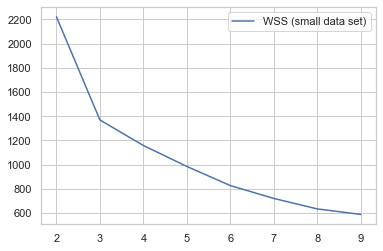

In [19]:
n = range(2,10)
plt.plot(n,sse,label="WSS (small data set)")
plt.legend()

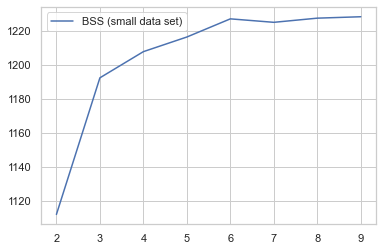

In [20]:
plt.plot(n,bss,label="BSS (small data set)")
plt.legend()

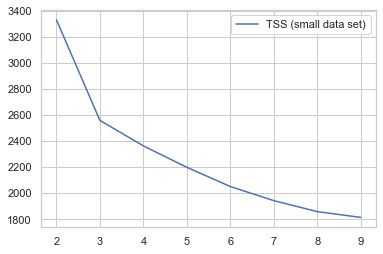

In [21]:
plt.plot(n,tss,label="TSS (small data set)")
plt.legend()

***
## Section: 1.3 - For the K=3 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

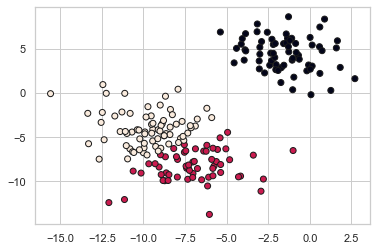

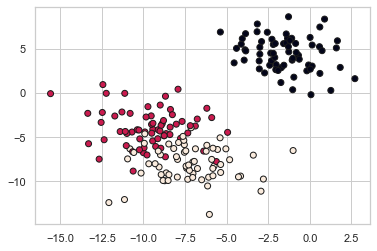

In [22]:
km_3 = KMeans(n_clusters= 3, random_state=42)
km_3.fit(X)
labels = km_3.labels_
y_pred = km_3.predict(X)
plt.new_figure_manager(1)
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(float), edgecolor="k")

plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

In [23]:
km_3.cluster_centers_

array([[-1.51913757,  4.42859241],
       [-6.92293119, -8.31221535],
       [-9.6698238 , -4.0262696 ]])

In [24]:
n_centroids

[[-1.5191375695212064, 4.4285924082386074],
 [-9.58387020764176, -3.9671524910023757],
 [-7.259904617969303, -7.982596735706903]]

In [25]:
# matching the true and assigned cluster values

for i in range(len(X)):
    if y[i] == 1:
        y[i]=-1
    if y[i]==2:
        y[i]=1

y[y==-1]=2

Text(0.5, 1.0, 'Pedicted clusters')

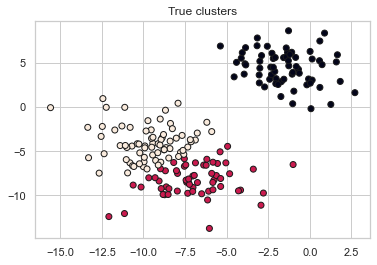

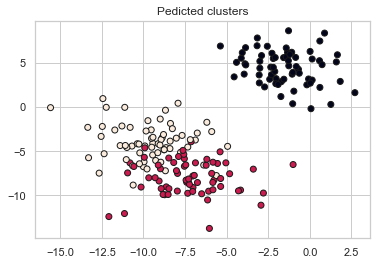

In [26]:

plt.new_figure_manager(1)
plt.scatter(X[:, 0], X[:, 1], c=labels.astype(float), edgecolor="k")
plt.title('True clusters')

plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.title('Pedicted clusters')


Text(0.5, 1.0, 'Confusion matrix for small data set')

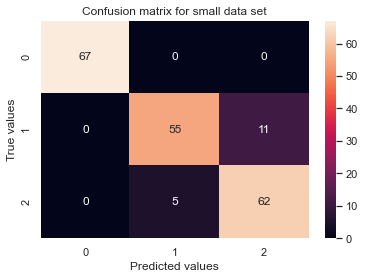

In [27]:
ax= sns.heatmap(confusion_matrix(y, y_pred), annot = True)
ax.set(xlabel="Predicted values", ylabel="True values")
ax.set_title('Confusion matrix for small data set')

In [28]:
small_data_accuracy = accuracy_score(y, y_pred)*100
small_data_pres = precision_score(y, y_pred, average='macro')*100
small_data_rec = recall_score(y, y_pred, average='macro')*100
small_data_f1 =  f1_score(y, y_pred, average='macro')*100
print('Accuracy of our model for small data set is equal ' + str(round(small_data_accuracy, 2)) + ' %.')
print('Precision of our model for small data set is equal ' + str(round(small_data_pres, 2)) + ' %.')
print('Recall of our model for small data set is equal ' + str(round(small_data_rec, 2)) + ' %.')
print('F1 score of our model for small data set is equal ' + str(round(small_data_f1, 2)) + ' %.')

Accuracy of our model for small data set is equal 92.0 %.
Precision of our model for small data set is equal 92.2 %.
Recall of our model for small data set is equal 91.96 %.
F1 score of our model for small data set is equal 91.96 %.


***
## Section: 1.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

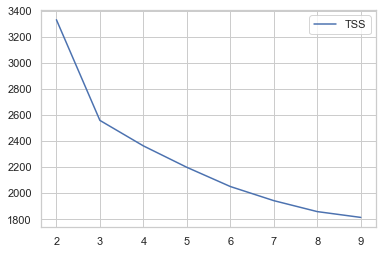

In [29]:
plt.plot(n,tss,label="TSS")
plt.legend()

The Elbow method is a very popular technique and the idea is to run k-means clustering for a range of clusters k (let’s say from 1 to 10) and for each value, we are calculating the sum of squared distances from each point to its assigned center(distortions).

When the distortions are plotted and the plot looks like an arm then the “elbow”(the point of inflection on the curve) is the best value of k.

So 3 is the best in the above case.

Source: https://predictivehacks.com/k-means-elbow-method-code-for-python/


***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [30]:
large1_data = pd.read_csv("Large1_Xydf.csv")
large1_data.head()

,Unnamed: 0,X0,X1,y
0,0,-9.726992,2.721249,7
1,1,-5.996252,7.593801,6
2,2,-9.952717,2.473725,7
3,3,-3.845438,2.406487,4
4,4,-6.735778,-1.920447,3


In [31]:

X_large1 = large1_data[['X0','X1']].values
y_large1 = large1_data[['y']].values.reshape(-1)


In [32]:
uniq_y_l1_val = len(np.unique(y_large1)) #calculating the total number of clusters
uniq_y_l1_val

8

In [33]:
c = centroid(X_large1)

In [34]:
np.unique(y_large1)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [35]:
n_centroids_large1 = []
for i in range(uniq_y_l1_val):
    points = X_large1[(y_large1==i)]
    n_centroids_large1.append(centroid(points))

In [36]:
centroids_list_large1 = [n_centroids_large1[i] for i in y_large1]

In [37]:
sse =0
bss=0
# calculate square of Euclidean distance of each point from its cluster center and add it to the variable sse
for i in range(len(X_large1)):
    sse += (X_large1[i, 0] - centroids_list_large1[i][0]) ** 2 + (X_large1[i, 1] - centroids_list_large1[i][1]) ** 2
    bss += (c[0] - centroids_list_large1[i][0])**2 + (c[1] - centroids_list_large1[i][1])**2


In [38]:
print("The true WSS value for large data set 1 is:",sse)
print("The true BSS value for large data set 1 is:",bss)
print("The total SSE value for large data set 1 is:",sse+bss)

The true WSS value for large data set 1 is: 5997.740497490684
The true BSS value for large data set 1 is: 102021.45302436023
The total SSE value for large data set 1 is: 108019.19352185092


***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

In [39]:
sse,bss, tss, r_time = calculate_WSS(X_large1,6,21,2)

In [40]:
print("Predicted WSS,BSS, TSS and run time for k=6 for large data set 1:",sse[0],',',bss[0],',',tss[0],',', r_time[0],"sec")
print("Predicted WSS,BSS, TSS and run time for k=8 for large data set 1:",sse[1],',',bss[1],',',tss[1],',', r_time[1],"sec")
print("Predicted WSS,BSS, TSS and run time for k=10 for large data set 1:",sse[2],',',bss[2],',',tss[2],',', r_time[2],"sec")

Predicted WSS,BSS, TSS and run time for k=6 for large data set 1: 8332.676874758323 , 16621.47783860351 , 24954.154713361833 , 0.6875 sec
Predicted WSS,BSS, TSS and run time for k=8 for large data set 1: 5226.366740595261 , 16813.363530552047 , 22039.73027114731 , 1.875 sec
Predicted WSS,BSS, TSS and run time for k=10 for large data set 1: 4645.288639344695 , 16836.984211924933 , 21482.272851269627 , 1.984375 sec


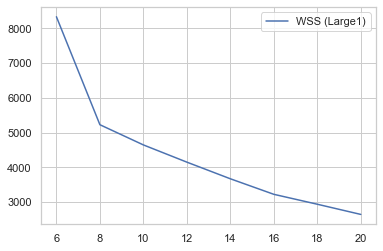

In [41]:
n = range(6,21,2)
plt.plot(n,sse,label="WSS (Large1)")
plt.legend()

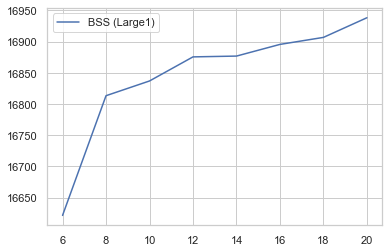

In [42]:
plt.plot(n,bss,label="BSS (Large1)")
plt.legend()

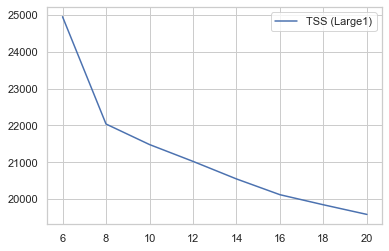

In [43]:
plt.plot(n,tss,label="TSS (Large1)")
plt.legend()

***
## Section: 2.3 - For the K=8 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

Text(0.5, 1.0, 'Predicted cluster')

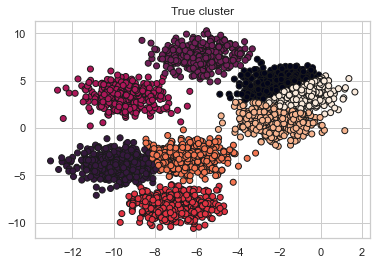

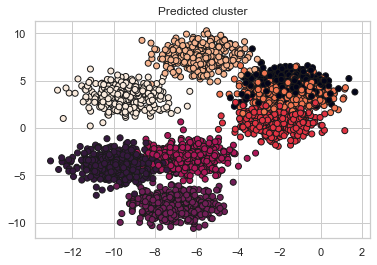

In [44]:
km_8 = KMeans(n_clusters = 8,random_state=42)
km_8.fit(X_large1)
labels = km_8.labels_
y_large1_pred = km_8.predict(X_large1)
plt.new_figure_manager(1)
plt.scatter(X_large1[:, 0], X_large1[:, 1], c=labels.astype(float), edgecolor="k")
plt.title("True cluster")

plt.figure(2)
plt.scatter(X_large1[:, 0], X_large1[:, 1], c=y_large1, edgecolor="k")
plt.title("Predicted cluster")

In [45]:
km_8.cluster_centers_

array([[-2.14041989,  4.75450621],
       [-9.91566762, -3.90031052],
       [-5.82328278,  7.5901148 ],
       [-9.44565045,  3.30147696],
       [-7.08100044, -8.19152624],
       [-6.27124785, -3.13592193],
       [-2.18737733,  0.71236329],
       [-0.95480704,  3.43496659]])

In [46]:
n_centroids_large1

[[-1.6486167430376726, 4.474029984118879],
 [-9.90455437004273, -3.909895923599485],
 [-7.074242507906475, -8.17138109150857],
 [-6.305538122484977, -3.1134955086799674],
 [-2.086218104607331, 0.7851998479713556],
 [-1.5856728506999689, 3.752177739350074],
 [-5.819039550204485, 7.572035218181492],
 [-9.45618141660722, 3.3049533354820064]]

In [47]:
# matching true cluster to predicted cluster number
for i in range(len(X_large1)):
    if y_large1[i] == 0:
        y_large1[i]=-1
    if y_large1[i]==1:
        y_large1[i]=-2
    if y_large1[i] == 2:
        y_large1[i]=-3
    if y_large1[i]==3:
        y_large1[i]=-4
    if y_large1[i] ==4:
        y_large1[i]=-5
    if y_large1[i]==5:
        y_large1[i]=-6
    if y_large1[i] ==6:
        y_large1[i]=-7
    if y_large1[i]==7:
        y_large1[i]=-8
    

y_large1[y_large1==-1]=0
y_large1[y_large1==-2]=1
y_large1[y_large1==-3]=4
y_large1[y_large1==-4]=5
y_large1[y_large1==-5]=6
y_large1[y_large1==-6]=7
y_large1[y_large1==-7]=2
y_large1[y_large1==-8]=3

Text(0.5, 1.0, 'True cluster')

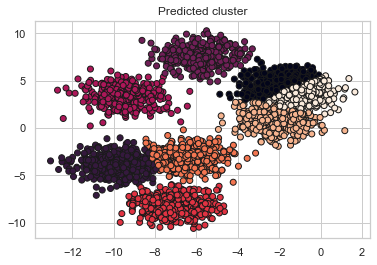

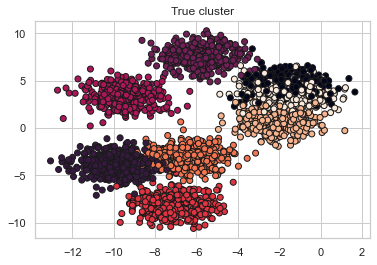

In [48]:

plt.new_figure_manager(1)
plt.scatter(X_large1[:, 0], X_large1[:, 1], c=labels.astype(float), edgecolor="k")
plt.title("Predicted cluster")

plt.figure(2)
plt.scatter(X_large1[:, 0], X_large1[:, 1], c=y_large1, edgecolor="k")
plt.title("True cluster")

Text(0.5, 1.0, 'Confusion matrix for Large data set 1')

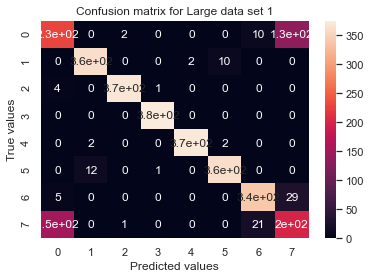

In [49]:
ax= sns.heatmap(confusion_matrix(y_large1, y_large1_pred), annot = True)
ax.set(xlabel="Predicted values", ylabel="True values")
ax.set_title('Confusion matrix for Large data set 1')

In [50]:
l1_data_accuracy = accuracy_score(y_large1, y_large1_pred)*100
l1_data_pres = precision_score(y_large1, y_large1_pred, average='macro')*100
l1_data_rec = recall_score(y_large1, y_large1_pred, average='macro')*100
l1_data_f1 =  f1_score(y_large1, y_large1_pred, average='macro')*100
print('Accuracy of our model for large data set 1 is equal ' + str(round(l1_data_accuracy, 2)) + ' %.')
print('Precision of our model for large data set 1 is equal ' + str(round(l1_data_pres, 2)) + ' %.')
print('Recall of our model for large data set 1 is equal ' + str(round(l1_data_rec, 2)) + ' %.')
print('F1 score of our model for large data set 1 is equal ' + str(round(l1_data_f1, 2)) + ' %.')

Accuracy of our model for large data set 1 is equal 87.03 %.
Precision of our model for large data set 1 is equal 87.07 %.
Recall of our model for large data set 1 is equal 87.03 %.
F1 score of our model for large data set 1 is equal 87.04 %.


***
## Section: 2.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

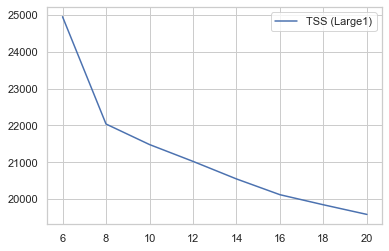

In [51]:
plt.plot(n,tss,label="TSS (Large1)")
plt.legend()

Preferred clustering is k=8, as we can see from the graph of WSS, BSS and TSS.

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [74]:
large2_data = pd.read_csv("Large2_Xydf.csv")
large2_data.head()

,Unnamed: 0,X0,X1,y
0,0,0.422710,-0.544382,1
1,1,0.750712,-0.316916,1
2,2,-1.052781,0.483709,0
3,3,0.035695,0.479169,1
4,4,-0.482704,0.358094,0


In [75]:

X_large2 = large2_data[['X0','X1']].values
y_large2 = large2_data[['y']].values.reshape(-1)

In [76]:
uniq_y_l2_val = len(np.unique(y_large2)) #calculating the total number of clusters
uniq_y_l2_val

2

In [77]:
np.unique(y_large2)

array([0, 1], dtype=int64)

In [78]:
c= centroid(X_large2)

In [79]:
n_centroids_large2 = []
for i in range(uniq_y_l2_val):
    points = X_large2[(y_large2==i)]
    n_centroids_large2.append(centroid(points))

In [80]:
centroids_list_large2 = [n_centroids_large2[i] for i in y_large2]

In [81]:
sse =0
bss=0
# calculate square of Euclidean distance of each point from its cluster center and add it to the variable sse
for i in range(len(X_large2)):
    sse += (X_large2[i, 0] - centroids_list_large2[i][0]) ** 2 + (X_large2[i, 1] - centroids_list_large2[i][1]) ** 2
    bss += (c[0] - centroids_list_large2[i][0])**2 + (c[1] - centroids_list_large2[i][1])**2


In [82]:
print("The true WSS value for large data 2 is:",sse)
print("The true BSS value for large data 2 is:",bss)
print("The total SSE value for large data 2 is:",sse+bss)

The true WSS value for large data 2 is: 1917.727623288943
The true BSS value for large data 2 is: 1219.5688117058564
The total SSE value for large data 2 is: 3137.2964349947997


***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

In [88]:
sse,bss, tss, r_time = calculate_WSS(X_large2,2,11,1)

In [89]:
print("WSS,BSS, TSS and run time for k=2 for large data 2:",sse[1],',',bss[0],',',tss[0],',', r_time[0],"sec")
print("WSS,BSS, TSS and run time for k=3 for large data 2:",sse[2],',',bss[1],',',tss[1],',', r_time[1],"sec")
print("WSS,BSS, TSS and run time for k=4 for large data 2:",sse[3],',',bss[2],',',tss[2],',', r_time[2],"sec")

WSS,BSS, TSS and run time for k=2 for large data 2: 880.4194540595832 , 2340.997475997471 , 3651.2410238087195 , 0.84375 sec
WSS,BSS, TSS and run time for k=3 for large data 2: 592.6991282739154 , 2109.368761683787 , 2989.78821574337 , 1.921875 sec
WSS,BSS, TSS and run time for k=4 for large data 2: 465.091234266007 , 2524.070643128679 , 3116.7697714025944 , 1.828125 sec


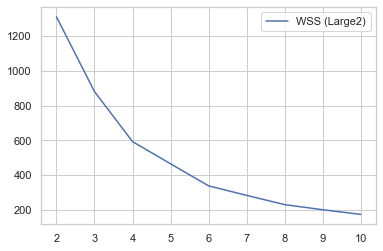

In [90]:
n = range(2,11,1)
plt.plot(n,sse,label="WSS (Large2)")
plt.legend()

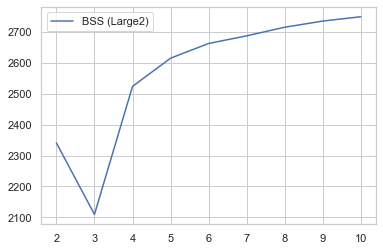

In [91]:
plt.plot(n,bss,label="BSS (Large2)")
plt.legend()

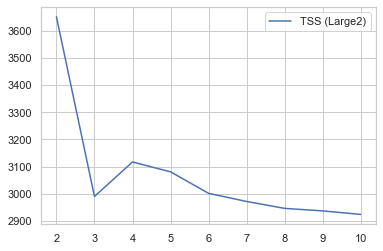

In [92]:
plt.plot(n,tss,label="TSS (Large2)")
plt.legend()

***
## Section: 3.3 - For the K=2 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

Text(0.5, 1.0, 'True cluster')

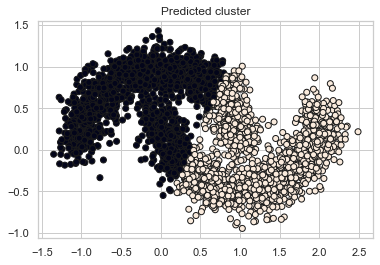

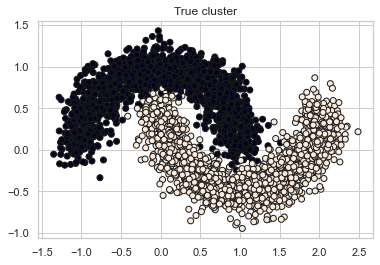

In [93]:
km_2 = KMeans(n_clusters = 2,random_state=42)
km_2.fit(X_large2)
labels = km_2.labels_
y_large2_pred = km_2.predict(X_large2)
plt.new_figure_manager(1)
plt.scatter(X_large2[:, 0], X_large2[:, 1], c=labels.astype(float), edgecolor="k")
plt.title("Predicted cluster")
plt.figure(2)
plt.scatter(X_large2[:, 0], X_large2[:, 1], c=y_large2, edgecolor="k")
plt.title("True cluster")

# matching the true and assigned cluster values

for i in range(len(X_large2)):
    if y_large2[i] == 0:
        y_large2[i]=-1
    if y_large2[i]==1:
        y_large2[i]=0

y_large2[y_large2==-1]=1

Text(0.5, 1.0, 'Confusion matrix for large data set 2')

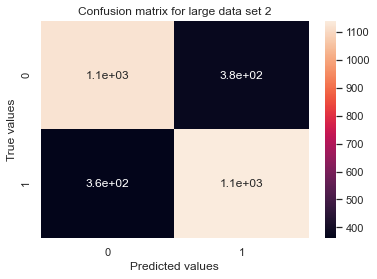

In [94]:
ax= sns.heatmap(confusion_matrix(y_large2, y_large2_pred), annot = True)
ax.set(xlabel="Predicted values", ylabel="True values")
ax.set_title('Confusion matrix for large data set 2')

In [95]:
l2_accuracy = accuracy_score(y_large2, y_large2_pred)*100
l2_pres = precision_score(y_large2, y_large2_pred, average='macro')*100
l2_rec = recall_score(y_large2, y_large2_pred, average='macro')*100
l2_f1 =  f1_score(y_large2, y_large2_pred, average='macro')*100
print('Accuracy of our model for large data set 2 is equal ' + str(round(l2_accuracy, 2)) + ' %.')
print('Precision of our model for large data set 2 is equal ' + str(round(l2_pres, 2)) + ' %.')
print('Recall of our model for large data set 2 is equal ' + str(round(l2_rec, 2)) + ' %.')
print('F1 score of our model for large data set 2 is equal ' + str(round(l2_f1, 2)) + ' %.')

Accuracy of our model for large data set 2 is equal 75.33 %.
Precision of our model for large data set 2 is equal 75.34 %.
Recall of our model for large data set 2 is equal 75.33 %.
F1 score of our model for large data set 2 is equal 75.33 %.


***
## Section: 3.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

Using the elbow method, we see that K=2 is the best. This can be seen using the graph showing the values of WSS, BSS and TSS above.

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

The next algorithm I chose is Hierarchical clustering.It builds a hierarchy of clusters. In Agglomerative clustering, each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy. It seems more informative than the	unstructured set of	flat clusters returned	by	k-means. Therefore,	it	is	easier	to	decide on the number of	clusters by	looking	at the	dendrogram.

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the Total SSE (WSS+BSS), and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

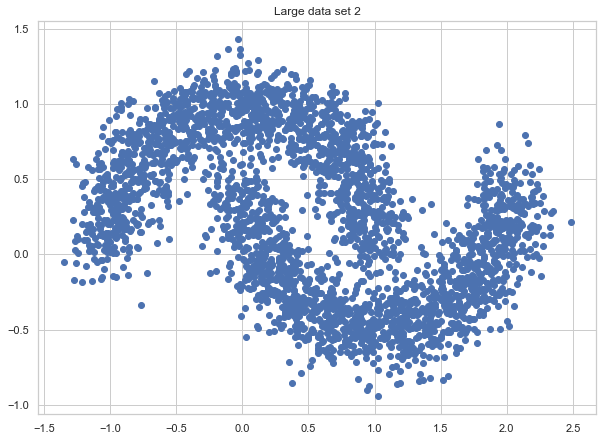

In [97]:
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X_large2[:,0],X_large2[:,1], label='True Position')
plt.title("Large data set 2")
plt.show()

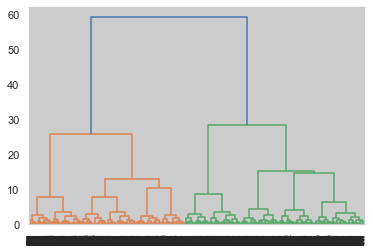

In [98]:
t1_start = process_time()
linked = linkage(X_large2, method='ward', metric='euclidean')
t1_stop = process_time()
t_r = t1_stop - t1_start
dendrogram(linked)
plt.show()


The process time for single linkage is: 0.0 sec


Text(0.5, 1.0, 'Predicted cluster (Single linkage)')

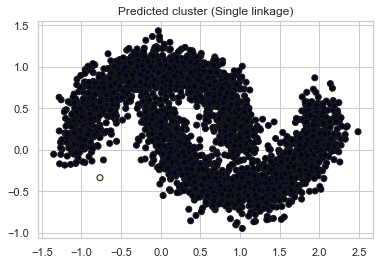

In [99]:
from sklearn.cluster import AgglomerativeClustering
t1_start = process_time()
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
t1_stop = process_time()
y_h_pred = cluster.fit_predict(X_large2)
print("The process time for single linkage is:", t1_stop - t1_start, "sec")
plt.new_figure_manager(1)
plt.scatter(X_large2[:, 0], X_large2[:, 1], c=y_h_pred, edgecolor="k")
plt.title("Predicted cluster (Single linkage)")

Single linkage which minimizes the distance between the closest observations of pairs of clusters did not do well in our case

The process time for average linkage is: 0.0 sec


Text(0.5, 1.0, 'Predicted cluster (Average linkage)')

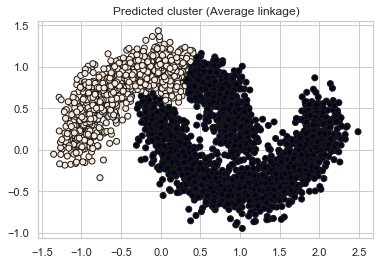

In [100]:
t1_start = process_time()
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')  
t1_stop = process_time()
y_h_pred = cluster.fit_predict(X_large2)
print("The process time for average linkage is:", t1_stop - t1_start, "sec")
plt.new_figure_manager(1)
plt.scatter(X_large2[:, 0], X_large2[:, 1], c=y_h_pred, edgecolor="k")
plt.title("Predicted cluster (Average linkage)")

Average linkage minimizes the average of the distances between all observations of pairs of clusters.  It is better than single linkage in our case.

The process time for complete linkage is: 0.0 sec


Text(0.5, 1.0, 'Predicted cluster (Complete linkage)')

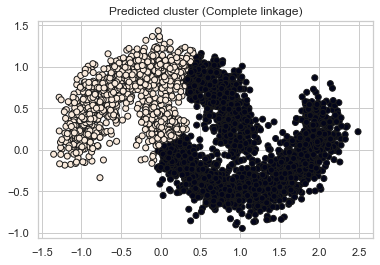

In [101]:
t1_start = process_time()
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')  
t1_stop = process_time()
y_h_pred = cluster.fit_predict(X_large2)
print("The process time for complete linkage is:", t1_stop - t1_start, "sec")
plt.new_figure_manager(1)
plt.scatter(X_large2[:, 0], X_large2[:, 1], c=y_h_pred, edgecolor="k")
plt.title("Predicted cluster (Complete linkage)")

 Complete linkage minimizes the maximum distance between observations of pairs of clusters.

The process time for ward linkage is: 0.0 sec


Text(0.5, 1.0, 'Predicted cluster (Ward linkage)')

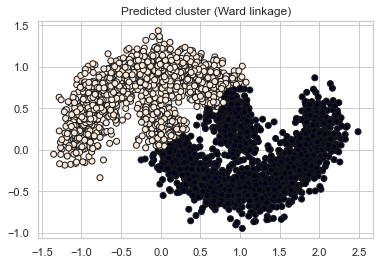

In [102]:
t1_start = process_time()
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
t1_stop = process_time()
y_h_pred = cluster.fit_predict(X_large2)
print("The process time for ward linkage is:", t1_stop - t1_start, "sec")
plt.new_figure_manager(1)
plt.scatter(X_large2[:, 0], X_large2[:, 1], c=y_h_pred, edgecolor="k")
plt.title("Predicted cluster (Ward linkage)")

Ward minimizes the sum of squared differences within all clusters. It seems to be the best out of all four. So we will restrict ourself to ward hierarchical clustering for our dataset.

Text(0.5, 1.0, 'True cluster')

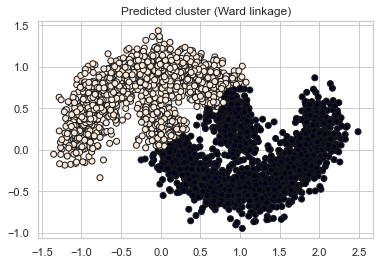

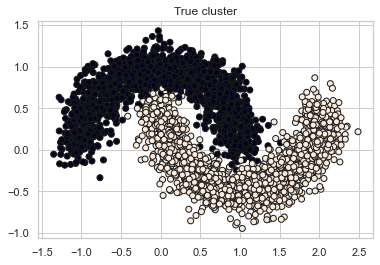

In [118]:
plt.new_figure_manager(1)
plt.scatter(X_large2[:, 0], X_large2[:, 1], c=y_h_pred, edgecolor="k")
plt.title("Predicted cluster (Ward linkage)")

plt.figure(2)
plt.scatter(X_large2[:, 0], X_large2[:, 1], c=y_large2, edgecolor="k")
plt.title("True cluster")

Matching true and predicted cluster values

In [119]:
y_new = np.zeros(len(X_large2))
for i in range(len(X_large2)):
    if y_large2[i] == 0:
        y_new[i]=1
  

Text(0.5, 1.0, 'True cluster')

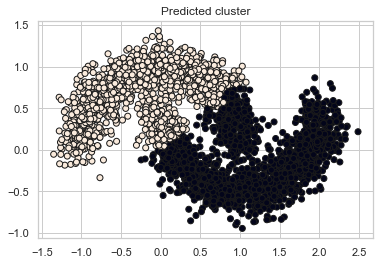

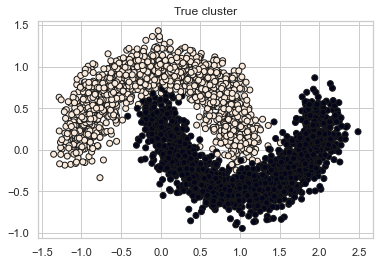

In [120]:
plt.new_figure_manager(1)
plt.scatter(X_large2[:, 0], X_large2[:, 1], c=y_h_pred, edgecolor="k")
plt.title("Predicted cluster")

plt.figure(2)
plt.scatter(X_large2[:, 0], X_large2[:, 1], c=y_new, edgecolor="k")
plt.title("True cluster")

Text(0.5, 1.0, 'Confusion matrix for Hierarchical clustering')

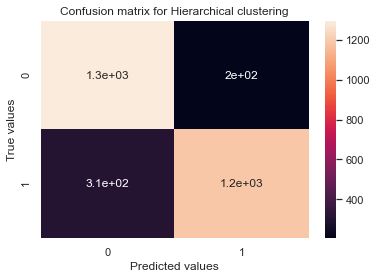

In [121]:
ax= sns.heatmap(confusion_matrix(y_new, y_h_pred), annot = True)
ax.set(xlabel="Predicted values", ylabel="True values")
ax.set_title('Confusion matrix for Hierarchical clustering')

In [122]:
h_accuracy = accuracy_score(y_new, y_h_pred)*100
h_pres = precision_score(y_new, y_h_pred, average='macro')*100
h_rec = recall_score(y_new, y_h_pred, average='macro')*100
h_f1 =  f1_score(y_new, y_h_pred, average='macro')*100
print('Accuracy of our Hierarchical clustering model is equal ' + str(round(h_accuracy, 2)) + ' %.')
print('Precision of our Hierarchical clustering model is equal ' + str(round(h_pres, 2)) + ' %.')
print('Recall of our Hierarchical clustering model is equal ' + str(round(h_rec, 2)) + ' %.')
print('F1 score of our Hierarchical clustering model is equal ' + str(round(h_f1, 2)) + ' %.')

Accuracy of our Hierarchical clustering model is equal 82.9 %.
Precision of our Hierarchical clustering model is equal 83.06 %.
Recall of our Hierarchical clustering model is equal 82.9 %.
F1 score of our Hierarchical clustering model is equal 82.88 %.


In [113]:
c = centroid(X_large2)

In [114]:
h_centroids = []
for i in range(2):
    points = X_large2[(y_h_pred==i)]
    h_centroids.append(centroid(points))

In [115]:
h_centroids_list = [h_centroids[i] for i in y_h_pred]

In [116]:
sse =0
bss=0
# calculate square of Euclidean distance of each point from its cluster center and add it to the variable sse
for i in range(len(X_large2)):
    sse += (X_large2[i, 0] - h_centroids_list[i][0]) ** 2 + (X_large2[i, 1] - h_centroids_list[i][1]) ** 2
    bss += (c[0] - h_centroids_list[i][0])**2 + (c[1] - h_centroids_list[i][1])**2

In [117]:
print("The WSS value for Hierarchical clustering is:",sse)
print("The true BSS for Hierarchical clustering value is:",bss)
print("The total SSE for Hierarchical clustering value is:",sse+bss)

The WSS value for Hierarchical clustering is: 1378.512778023706
The true BSS for Hierarchical clustering value is: 1758.7836569711312
The total SSE for Hierarchical clustering value is: 3137.296434994837


***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

In [112]:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the Total SSE (WSS+BSS), and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [116]:
# Compute DBSCAN for various epsilon and min_sample values
for i in np.arange(0.1, 0.3, 0.05):
    for j in range(2,5):

        db = DBSCAN(eps=i, min_samples=j).fit(X_large2)
        labels = db.labels_

        no_clusters = len(np.unique(labels) )
        no_noise = np.sum(np.array(labels) == -1, axis=0)

        print('Estimated no. of clusters: %d' % no_clusters,'for epsilon =',i,'and min_sample=',j)
        print('Estimated no. of noise points: %d' % no_noise,'for epsilon =',i,'and min_sample=',j)

Estimated no. of clusters: 9 for epsilon = 0.1 and min_sample= 2
Estimated no. of noise points: 6 for epsilon = 0.1 and min_sample= 2
Estimated no. of clusters: 3 for epsilon = 0.1 and min_sample= 3
Estimated no. of noise points: 18 for epsilon = 0.1 and min_sample= 3
Estimated no. of clusters: 4 for epsilon = 0.1 and min_sample= 4
Estimated no. of noise points: 25 for epsilon = 0.1 and min_sample= 4
Estimated no. of clusters: 2 for epsilon = 0.15000000000000002 and min_sample= 2
Estimated no. of noise points: 2 for epsilon = 0.15000000000000002 and min_sample= 2
Estimated no. of clusters: 2 for epsilon = 0.15000000000000002 and min_sample= 3
Estimated no. of noise points: 2 for epsilon = 0.15000000000000002 and min_sample= 3
Estimated no. of clusters: 2 for epsilon = 0.15000000000000002 and min_sample= 4
Estimated no. of noise points: 3 for epsilon = 0.15000000000000002 and min_sample= 4
Estimated no. of clusters: 2 for epsilon = 0.20000000000000004 and min_sample= 2
Estimated no. of 

In [140]:
cluster_v = []
for i in np.arange(0.1, 0.8, 0.05):
    

    db = DBSCAN(eps=i, min_samples=5).fit(X_large2)
    labels = db.labels_

    no_clusters = len(np.unique(labels) )
    no_noise = np.sum(np.array(labels) == -1, axis=0)

    cluster_v.append(no_clusters)

cluster_v

[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

epsilon = 0.15 and min_sample = 3 seems good

In [141]:
# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=5).fit(X_large2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y_large2, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y_large2, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y_large2, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y_large2, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(y_large2, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_large2, labels))


Estimated number of clusters: 1
Estimated number of noise points: 36
Homogeneity: 0.002
Completeness: 0.019
V-measure: 0.003
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.003
Silhouette Coefficient: 0.160


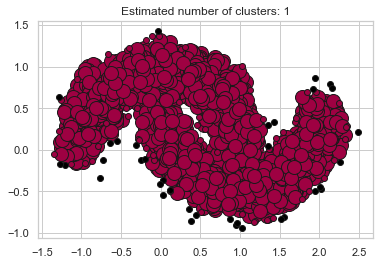

In [142]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X_large2[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X_large2[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

Each clustering algorithm has some advantages and some disadvantages. We need to decide which works the best for our data.

For example, in the case of KMean, it can be used with large datasets conveniently, it returns clusters which can be easily interpreted and even visualized. But at the same time, it clusters each and every point.  If we would like to exclude outliers or certain sample groups it won't be possible.
We saw it wasn't good even for the case of Large dataset2, when there is some pattern among the dataset.

Hierarchical clustering	outputs	a hierarchy. It seems more informative than	the	unstructured set of	flat clusters returned	by	k-means. Therefore,	it	is	easier	to	decide on the number of	clusters by	looking	at the	dendrogram. But, the disadvantage is that, it is not possible to undo the previous step: once the instances	have been assigned to a cluster, they can no longer	be	moved around. Inital seeds have a strong impact on	the	final results.	

***
### END-OF-SUBMISSION
***